# COGS 108 - EDA Checkpoint

# Names

- Calixto Calangi
- Ivan Guo
- Thoai Phan
- Brian Ponce



# Research Question

Between a country's population and how much of their GDP is allocated to sports, is there a relationship to how well their respective athletes do in medal placements (gold, silver, bronze) at the Olympics? Essentially, as a result of either a country's population or GDP, do either have a significant factor in predicting/relating to athletes' medal placements at the Olympics?

## Background and Prior Work

One cannot deny the substantial revenues that the annual Olympics bring to many countries throughout the sporting world. According to an article from the International Olympic Committee, $590 million is usually spent towards athlete development, training of coaches and players, and the accessibility of the Olympic Games throughout the world. <a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) Some argue that the reason for these funding is due to the economic boom that might potentially happen as the Olympics encourage more tourism. After reading some background information on this topic, our group have decided to propose a tentative question: is it true that the higher the GDP of a country in that Olympic year, the higher the medal value they will receive? We would also do research on other factors, such as population size and healthcare accessibility (predominantly population), but we chose the Olympics because it is known to be the largest sporting celebration in terms of the number of events, athletes, and people gathered from the world for this annual event.

A published work that has been completed on this topic is from a few students at Georgia Institute of Technology, where they argued that GDP per capita is the main determinant to a country’s Olympic performance. <a name="cite_ref-2"></a>[<sup>1</sup>](#cite_note-2) However, after doing their research, they realized that a country’s size and healthcare expenditures per capita are the main factors that drive Olympic performance, rather than GDP per capita. To us, this is a valid argument because in the end, the better the general welfare of a country is the better their healthcare will be and athletes will have a higher chance of having better healthcare. Additionally, after analyzing some unrestricted multiple variable regression models, this group realized that the relationship between Olympic performance, country’s size, and per capita health expenditure make more sense and these were the only variables that were significant at the 5% level.

After looking at this published project, we decided to consider other factors besides GDP. This project also includes the healthcare that a country receives as a factor, but we also want to see if the amount of spending and expenditures that are allocated to sports have an affect on the medals that a country receive during the Olympics. There are a lot of hidden factors that might impact athletes’ performances during this event, but the purpose of this project is to see which factors are the most significant. We also want to see if a country’s population has an affect on one’s standing in the Olympics (i.e., is it true that the larger the population size, the more likely a country is to do better?).

1. <a name="cite_note-1"></a> [^](#cite_ref-1) How the IOC finances a better world through sport. *International Olympic Committee*. https://olympics.com/ioc/funding 
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Boudreau, et.al. The Miracle on Thin Ice: How A Nation's GDP Affects its Olympic Performance. *Georgia Institute of Technology*. https://repository.gatech.edu/server/api/core/bitstreams/1aa2b537-c3de-4177-8295-3fcd3a03a965/content#:~:text=We%20estimate%20that%20GDP%20per,bronze%20medals%20a%20country%20receives. 




# Hypothesis


The hypothesis we suppose is that more allocation of government spending/expenditure towards athletes and sports, in general, should translate to better performance and better medal placements of athletes at the Olympics, whereas population isn't as a significant contributor. Given that the resources needed to succeed in sports (training equipment, facilities) we argue that government spending is an overall better metric for athletes' performance. We also noticed that there is preliminary research that has looked at the relationship between healthcare expenditures and performance, with healthcare being a strong indicator. 

However, it would make sense that how much of government spending is allocated towards sports should then be a stronger indicator of Olympic performance; the resources that are necessary for an athlete to succeed obviously include access to the best healthcare, but, more importantly, their access to top of the line sports resources (better facilities, equipment, training.)

# Data

## Data overview

For each dataset include the following information
- Dataset #1
  - Dataset Name: Athlete Events in Olympic History
  - Link to the dataset: https://github.com/cstorm125/information_value/blob/master/data/120-years-of-olympic-history-athletes-and-results/athlete_events.csv
  - Number of observations: 271117 (we will make it shorter in this project)
  - Number of variables: 15


This dataset gives us information such as the year that the player played in the Olympics, event, medal, and season. We can use this dataset to see what countries have more winners and after discovering this, we can perform research on factors such as GDP that might contribute to their outstanding performances during the Olympics. Since this dataset has a lot of datapoints, we will most likely use a scatterplot to compare the relationship between two variables such as country and success.

- Dataset #2
  - Dataset Name: GDP across the World
  - Link to the dataset: https://datahub.io/core/gdp#readme
  - Number of observations: 266
  - Number of variables: 66

This dataset offers information about various countries' GDP, tracking all the way from 1960 to 2022. We are then able to match the years of a countries' GDP and their fluctuations in accordance with the Olympic dataset versus the population dataset, and analyze if there is a relationship between performance and GDP. The variables associated with this set are: the country, and their GDP tracked across the time period 1960-2022. Again, as per both the Olympic and population datasets, we are going to have to match them all to have some semblance of consistency, so we have to pare it down to 1960 onwards for all datasets.

Its sources come from the World Bank (https://data.worldbank.org/indicator/NY.GDP.MKTP.CD).



- Dataset #3 
  - Dataset Name: Population, 10,000 BCE to 2021
  - Link to the dataset: https://ourworldindata.org/grapher/population#sources-and-processing
  - Number of observations: 58252
  - Number of variables: 4

This dataset collects populations across the globe spanning from 10,000 BCE to 2021. The variables to glean from this dataset are: what country is it representing (Afghanistan, Zimbabwe, etc.), it's country code, the year and the population associated with that year. What would need to be done with this data, as with the other 2 datasets (along with a dataset we need to find GDP for,) is to trim it down to the years we can reliably find them having the same range. The Olympics range from 1896 to, as of 5/17/2024, the 2022 Olympics, whereas this data stretches from 10,000 BCE to 2021. 


## Setup

In [1]:
# The code we will be using for our wrangling/EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Dataset: 120 Years of Olympic Data

In [2]:
Olympics_120yr = pd.read_csv("https://raw.githubusercontent.com/cstorm125/information_value/master/data/120-years-of-olympic-history-athletes-and-results/athlete_events.csv")

#We want to restrict data to who the athletes are, gender (different performance for men's, women's), what games, what nationality, what sport, and what medal placement
Olympics_120yr = Olympics_120yr.drop(columns=['Age', 'Height','Weight', 'NOC', 'Season', 'City', 'Event', 'Games'])

#Eventually we want to wrangle this data into data where only medal placements (gold, silver, bronze) are present
Olympics_120yr = Olympics_120yr.dropna()

#We want to drop any years before 1960, as our GDP goes far back as 1960.
Olympics_120yr = Olympics_120yr[Olympics_120yr['Year'] >=1960]

#For our own convenience, renaming it from 'Team' to 'Country' will help with the EDA.
Olympics_120yr = Olympics_120yr.rename(columns={'Team': 'Country'})
Olympics_120yr

,ID,Name,Sex,Country,Year,Sport,Medal
40,16,Juhamatti Tapio Aaltonen,M,Finland,2014,Ice Hockey,Bronze
60,20,Kjetil Andr Aamodt,M,Norway,1992,Alpine Skiing,Gold
61,20,Kjetil Andr Aamodt,M,Norway,1992,Alpine Skiing,Bronze
63,20,Kjetil Andr Aamodt,M,Norway,1994,Alpine Skiing,Silver
64,20,Kjetil Andr Aamodt,M,Norway,1994,Alpine Skiing,Bronze
...,...,...,...,...,...,...,...
271049,135545,Henk Jan Zwolle,M,Netherlands,1996,Rowing,Gold
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,Soviet Union,1964,Athletics,Bronze
271082,135554,Bogusaw Zych,M,Poland,1980,Fencing,Bronze
271102,135563,Olesya Nikolayevna Zykina,F,Russia,2000,Athletics,Bronze


## Dataset: Tracking GDP of Countries Across Time

In [3]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION 
GDPdata = pd.read_csv("GDP.csv")

#The original dataset had country codes (AFG, USA, UK) which is not relevant for our purposes.
GDPdata= GDPdata.drop(columns=['Country Code'])

#Again, for our own convenience, renaming it all to 'Country' will help with the EDA
GDPdata = GDPdata.rename(columns={'Country Name': 'Country'})

# Alternative GDP data
GDPdata2 = pd.read_csv("GDP.csv")
GDPdata2 = GDPdata2.rename(columns={'Country Name': 'Country', 'Value': 'GDP'})
GDPdata2 = GDPdata2[['Country', 'Year', 'GDP']]  # Retain relevant columns

GDPdata

,Country,Year,Value
0,Afghanistan,1960,5.377778e+08
1,Afghanistan,1961,5.488889e+08
2,Afghanistan,1962,5.466667e+08
3,Afghanistan,1963,7.511112e+08
4,Afghanistan,1964,8.000000e+08
...,...,...,...
11502,Zimbabwe,2012,1.424249e+10
11503,Zimbabwe,2013,1.545177e+10
11504,Zimbabwe,2014,1.589105e+10
11505,Zimbabwe,2015,1.630467e+10


## Dataset: Populations Across the Globe OverTime

In [4]:
Population_Set = pd.read_csv('population.csv')
#since we have 1896 as the start of the Olympics, we can trim it down it 1960 onwards. We only need the entity (country name), so the code (AFG for Afghanistan) is redundant.
Population_Set = Population_Set[Population_Set['Year'] >=1960]

#This set uses country code (AFG, NOR, FIN), but this is not relevant for our purposes.
Population_Set = Population_Set.drop(columns=['Code'])

#For our convenience, renaming it 'Country' for all sets makes it easier to merge and do EDA.
Population_Set = Population_Set.rename(columns={'Entity': 'Country', 'Population (historical estimates)': 'Population'})
Population_Set

,Country,Year,Population
197,Afghanistan,1960,8622473
198,Afghanistan,1961,8790140
199,Afghanistan,1962,8969055
200,Afghanistan,1963,9157463
201,Afghanistan,1964,9355510
...,...,...,...
58247,Zimbabwe,2017,14751101
58248,Zimbabwe,2018,15052191
58249,Zimbabwe,2019,15354606
58250,Zimbabwe,2020,15669663


## Dataset: Categorize Countries into groups based on GDP and Population

In [5]:
# Load datasets
olympics = pd.read_csv("athlete_events.csv")
gdp_data = pd.read_csv("GDP.csv")
population_data = pd.read_csv("population.csv")

# Clean and prepare datasets
olympics = olympics[olympics['Year'] >= 1960]
olympics = olympics.dropna(subset=['Medal'])  # Keep only rows where medals were won
olympics['Medal'] = 1  # Assign a countable value for medals
olympics.rename(columns={'Team': 'Country'}, inplace=True)  # Rename 'Team' to 'Country'

# Correctly rename columns before merging
gdp_data.rename(columns={'Country Name': 'Country', 'Value': 'GDP'}, inplace=True)
population_data.rename(columns={'Entity': 'Country', 'Population (historical estimates)': 'Population'}, inplace=True)

# Merge datasets on 'Country' and 'Year'
combined_data = pd.merge(olympics, gdp_data[['Country', 'Year', 'GDP']], on=['Country', 'Year'], how='left')
combined_data = pd.merge(combined_data, population_data[['Country', 'Year', 'Population']], on=['Country', 'Year'], how='left')

# Summarize medals by country and year
combined_data = combined_data.groupby(['Country', 'Year']).agg({
    'Medal': 'sum',
    'GDP': 'mean',
    'Population': 'mean'
}).reset_index()

# Define categories based on quantiles
combined_data['GDP_Category'] = pd.qcut(combined_data['GDP'], 3, labels=['Low', 'Medium', 'High'])
combined_data['Population_Category'] = pd.qcut(combined_data['Population'], 3, labels=['Low', 'Medium', 'High'])
combined_data

,Country,Year,Medal,GDP,Population,GDP_Category,Population_Category
0,Afghanistan,2008,1,1.019053e+10,26427204.0,Low,Medium
1,Afghanistan,2012,1,2.053654e+10,30466484.0,Low,Medium
2,Algeria,1984,2,5.369828e+10,21393532.0,Medium,Medium
3,Algeria,1992,2,4.800330e+10,26748302.0,Medium,Medium
4,Algeria,1996,3,4.694150e+10,28984640.0,Medium,Medium
...,...,...,...,...,...,...,...
1317,Zambia,1984,1,2.739444e+09,6488077.0,Low,Low
1318,Zambia,1996,1,3.597221e+09,8902025.0,Low,Medium
1319,Zimbabwe,1980,15,6.678868e+09,7049931.0,Low,Low
1320,Zimbabwe,2004,3,5.805598e+09,12160885.0,Low,Medium


# Results/Exploratory Data Analysis

### Section 1: Looking at the Relationship Between Olympic Performance and Population

First, we want to have a clean, merged table on two different analyses: first, is population. That year's population is the same year they competed at the Olympics.

In [6]:
#Want to have a single data with the population of a athlete's nation in the year they competed (i.e., Aaltonen competed in the 2014 Olympics, 
# need Finland's population at that time.)
olympics_population = Olympics_120yr.merge(Population_Set, how='left')
olympics_population.dropna()

,ID,Name,Sex,Country,Year,Sport,Medal,Population
0,16,Juhamatti Tapio Aaltonen,M,Finland,2014,Ice Hockey,Bronze,5461436.0
1,20,Kjetil Andr Aamodt,M,Norway,1992,Alpine Skiing,Gold,4286560.0
2,20,Kjetil Andr Aamodt,M,Norway,1992,Alpine Skiing,Bronze,4286560.0
3,20,Kjetil Andr Aamodt,M,Norway,1994,Alpine Skiing,Silver,4336745.0
4,20,Kjetil Andr Aamodt,M,Norway,1994,Alpine Skiing,Bronze,4336745.0
...,...,...,...,...,...,...,...,...
28394,135545,Henk Jan Zwolle,M,Netherlands,1992,Rowing,Bronze,15150688.0
28395,135545,Henk Jan Zwolle,M,Netherlands,1996,Rowing,Gold,15538617.0
28397,135554,Bogusaw Zych,M,Poland,1980,Fencing,Bronze,35521432.0
28398,135563,Olesya Nikolayevna Zykina,F,Russia,2000,Athletics,Bronze,146844848.0


As we have already cleaned these two datasets before hand in the 'Dataset' section (remove country codes, age, weight, etc.,) we can now do EDA.
Using a barplot, we can see how Gold medalists tend to come from higher population groups, and follows suit for the other two medalists in a descending fashion. The barplot below illustrates average populations of countries that receive bronze, gold, and silver medals, respectively.

<AxesSubplot: xlabel='Population'>

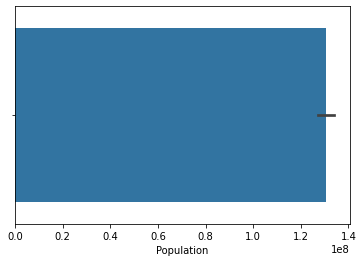

In [7]:
sns.barplot(data=olympics_population, x='Population', hue='Medal')

Of course, we also want to look at the correlation between population and the medalists themselves. The table below illustrates the amount of bronze, silver, and gold medals that each countries have received in alphabetical order (starting from Afghanistan and ending with Zimbabwe).


In [8]:
medal_count_country = olympics_population.groupby(by=["Country", "Medal"]).agg({'Medal':'count'})
medal_count_country

Medal
Country     Medal        
Afghanistan Bronze      2
Algeria     Bronze      8
            Gold        5
            Silver      4
Aphrodite   Bronze      3
...                   ...
Zambia      Bronze      1
            Silver      1
Zimbabwe    Bronze      1
            Gold       17
            Silver      4

[484 rows x 1 columns]

<AxesSubplot: xlabel='Country'>

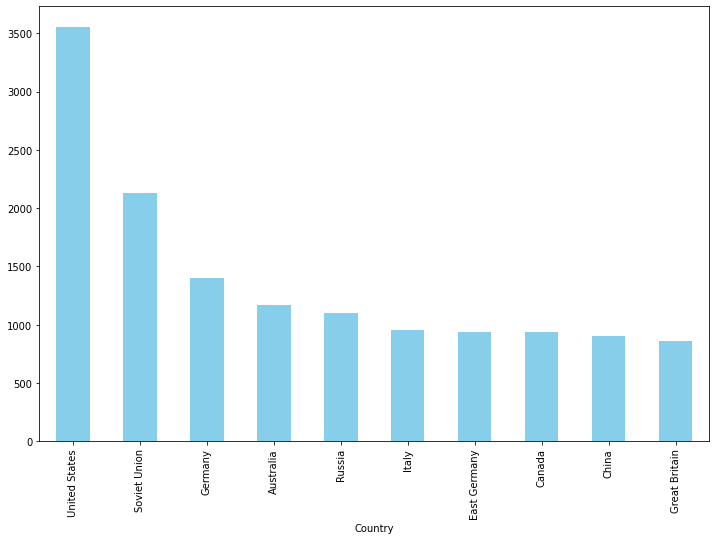

In [9]:
total_medals_by_country = olympics_population.groupby('Country')['Medal'].count().sort_values(ascending=False)

# Visualize top countries by total medal count
plt.figure(figsize=(12, 8))
total_medals_by_country.head(10).plot(kind='bar', color='skyblue')

##### EDA/Observations
* We see a tentative trend, in which gold medalists tend to come from higher population groups and bronze medalists tend to come from smaller population groups as they have the smallest populations according to the barplot. This suggests a potential association between population size and their rate of winning gold medals in the Olympics.


* In the bar plot above, we see that countries such as the United States, Soviet Union, and Germany are large countries that get a lot of medals during the Olympics. We know that Germany and United States are currently superpowers in the world, suggesting that larger populations tend to achieve higheir medal counts at the Olympics. 

### Section 2: Looking at the Relationship Between Olympic Performance and Their Nation's GDP


Second, the EDA we want to do in this section is another check on GDP. We have to merge it with our previous Olympic dataset and GDP dataset, having the year they competed it correlated with their country's GDP in a given year. In the table below, we see many players that participated in the Olympics int he twentieth and twenty-first century, and the current GDP and winning medal in that year.

In [10]:
#Want to merge a single dataset, but this time for GDP and the Olympic dataset. Again, the GDP of that athlete's country in a given year.
olympics_gdp = Olympics_120yr.merge(GDPdata, how='left')
olympics_gdp = olympics_gdp.dropna()
olympics_gdp

,ID,Name,Sex,Country,Year,Sport,Medal,Value
0,16,Juhamatti Tapio Aaltonen,M,Finland,2014,Ice Hockey,Bronze,2.726093e+11
1,20,Kjetil Andr Aamodt,M,Norway,1992,Alpine Skiing,Gold,1.308380e+11
2,20,Kjetil Andr Aamodt,M,Norway,1992,Alpine Skiing,Bronze,1.308380e+11
3,20,Kjetil Andr Aamodt,M,Norway,1994,Alpine Skiing,Silver,1.271315e+11
4,20,Kjetil Andr Aamodt,M,Norway,1994,Alpine Skiing,Bronze,1.271315e+11
...,...,...,...,...,...,...,...,...
28390,135523,"Ronald Ferdinand ""Ron"" Zwerver",M,Netherlands,1996,Volleyball,Gold,4.457046e+11
28391,135525,Martin Zwicker,M,Germany,2016,Hockey,Bronze,3.477796e+12
28392,135535,Claudia Antoinette Zwiers,F,Netherlands,1996,Judo,Bronze,4.457046e+11
28394,135545,Henk Jan Zwolle,M,Netherlands,1992,Rowing,Bronze,3.583304e+11


In [11]:
print("Descriptive Statistics for GDP:")
print(olympics_gdp['Value'].describe())

Descriptive Statistics for GDP:
count    1.853300e+04
mean     2.474121e+12
std      4.183842e+12
min      2.195836e+08
25%      1.298471e+11
50%      6.133298e+11
75%      2.465454e+12
max      1.862448e+13
Name: Value, dtype: float64


Country
Afghanistan       2
Algeria          17
Argentina       200
Armenia          16
Australia      1166
               ... 
Uruguay           2
Uzbekistan       34
Vietnam           4
Zambia            2
Zimbabwe         22
Name: Medal, Length: 116, dtype: int64


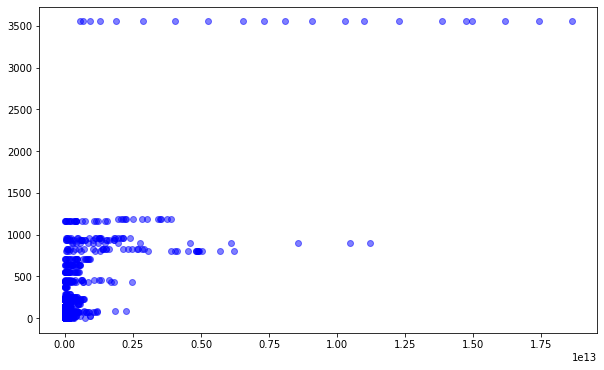

In [12]:
# Correlation Scatterplot
medal_count_by_country = olympics_gdp.groupby('Country')['Medal'].count()
print(medal_count_by_country)

# Extracting GDP and removing duplicates
gdp_by_country = olympics_gdp[['Country', 'Value']].drop_duplicates()
merged_data = pd.merge(gdp_by_country, medal_count_by_country, on='Country', how='inner')

# Plotting scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Value'], merged_data['Medal'], color='blue', alpha=0.5)

***

We can also create heatmaps to visualize the correlation between different numerical variables such as GDP, population,
and total medal count. This can help quickly identify which factors are most closely related.

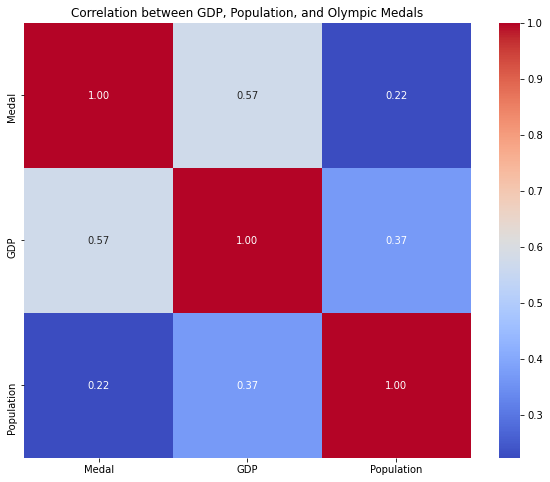

In [13]:
# Merging datasets
merged = pd.merge(Olympics_120yr, GDPdata2, on=['Country', 'Year'], how='left')
merged = pd.merge(merged, Population_Set, on=['Country', 'Year'], how='left')
merged = merged.dropna()

# Aggregate total medals by country and year
merged['Medal'] = merged['Medal'].apply(lambda x: 1 if pd.notnull(x) else 0)
medal_counts = merged.groupby(['Country', 'Year']).agg({'Medal': 'sum', 'GDP': 'mean', 'Population': 'mean'}).reset_index()

# Correlation matrix calculation
correlation_matrix = medal_counts[['Medal', 'GDP', 'Population']].corr()

# Heatmap Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between GDP, Population, and Olympic Medals')
plt.show()

**Medals vs. GDP (0.57):**
The correlation between Olympic medals and GDP is 0.57, which indicates a moderate to strong positive relationship. This suggests that countries with higher GDPs generally perform better in the Olympics, potentially due to more substantial investments in sports infrastructure, training, and athlete development. This correlation is significant enough to imply that economic power can translate into sports success.

**Medals vs. Population (0.22):**
The correlation between Olympic medals and population size is 0.22, showing a weak positive relationship. This lower correlation suggests that while having a larger population may provide a bigger talent pool, it is not as strongly correlated with Olympic success as GDP. This could mean that quality of training and investment may overtake sheer quantity of potential athletes in determining Olympic success.

**GDP vs. Population (0.37):**
A correlation of 0.37 between GDP and population indicates a moderate positive relationship. This is a logical outcome as larger populations can support bigger economies, but this correlation is not very strong, suggesting that other factors (like technology, industrialization, and economic policies) also play significant roles in determining a country's GDP beyond just its population size.

As we have cleaned this data before hand in our datasets (remove country code, merge), we can do some further EDA.

Medal
Bronze    2.037807e+12
Gold      3.073844e+12
Silver    2.330608e+12
Name: Value, dtype: float64


<AxesSubplot: xlabel='Medal'>

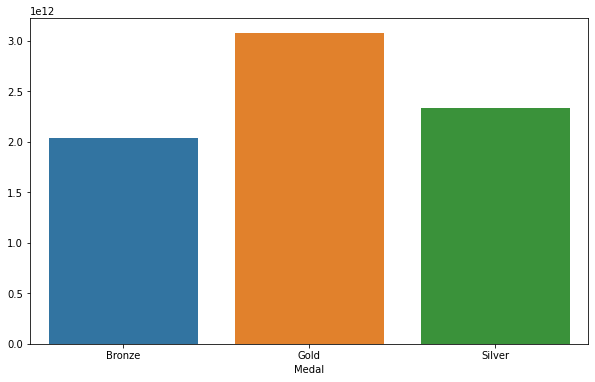

In [14]:
avg_gdp_by_medal = olympics_gdp.groupby('Medal')['Value'].mean()
print(avg_gdp_by_medal)

# Visualize average GDP by medal
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_gdp_by_medal.index, y=avg_gdp_by_medal.values)

##### EDA/Observations

* We see that there's a positive correlation, where countries with higher GDPs tend to win more Olympics medals. One can argue that this can be due to better funding for sports programs and access to training faciltiies, as mentioned in our hypothesis. Athletes that have this access gives them an advantage in competitions such as the Olympics. 


* In the scatterplot and barplot, we see that countries with bronze medals tend to have lower GDP and coutnries with gold medals tend to have higher GDPs illustrated especially in the outliers of the scatterplot. 


* This implies that there is a relationship between GDP/Olympic performance and that respective country's economic wealth because if they have the fund to support sporting, these affluent nations have a higher chance of winning medals and gain excellence in the annual Olympics.


* Economic Strength as a Predictor of Success: The relatively strong correlation between GDP and Olympic medals emphasizes the role of economic health in supporting sports. Nations with larger economies likely have better resources to fund athlete training programs and sports science research, contributing to better Olympic outcomes.


* Population Less Predictive: The lower correlation between population size and Olympic success indicates that merely having a large population is not enough. Strategic utilization of resources towards sports, selective nurturing of talents, and accessibility of sports programs to the populace are crucial.


* GDP and Population Dynamics: The moderate correlation between GDP and population suggests an interlinked growth mechanism but also highlights that other sophisticated factors drive economic growth, which, in turn, might be channeling into sports success indirectly.

### Section 3: Does higher GDP or larger populations mean more Olympic success?

**Perform an ANOVA to check if there are statistically significant differences between groups:**

In [15]:
# ANOVA for GDP categories
model_gdp = ols('Medal ~ C(GDP_Category)', data=combined_data).fit()
anova_gdp = sm.stats.anova_lm(model_gdp, typ=2)
print(anova_gdp)

# ANOVA for Population categories
model_pop = ols('Medal ~ C(Population_Category)', data=combined_data).fit()
anova_pop = sm.stats.anova_lm(model_pop, typ=2)
print(anova_pop)

                       sum_sq     df          F        PR(>F)
C(GDP_Category)  2.051186e+05    2.0  83.899766  6.122871e-34
Residual         1.024373e+06  838.0        NaN           NaN
                              sum_sq     df          F        PR(>F)
C(Population_Category)  1.466963e+05    2.0  56.834331  4.259202e-24
Residual                1.282817e+06  994.0        NaN           NaN


/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


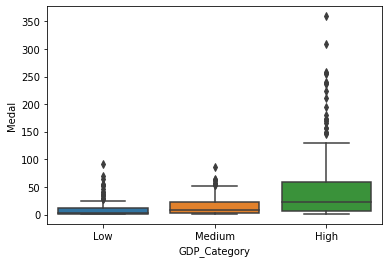

/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


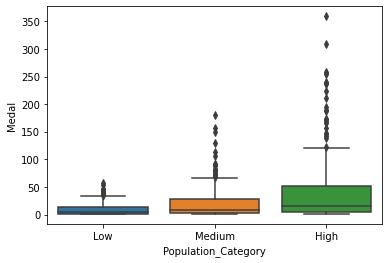

In [16]:
# Box plots for visual inspection
sns.boxplot(x='GDP_Category', y='Medal', data=combined_data)
plt.show()

sns.boxplot(x='Population_Category', y='Medal', data=combined_data)
plt.show()

##### EDA/Observations

1. GDP Category
    * F-value = 83.899766 and P-value = 6.12e-34.
    * The F-test statistic is quite high, and the p-value is very low (practically zero), indicating that the differences in mean medal counts among the low, medium, and high GDP categories are statistically significant. This suggests that GDP has a significant impact on Olympic success.
    * For boxplot, the median medal count increases from low to high GDP categories. The interquartile range (IQR) is wider in the high GDP category, suggesting more variability in medal counts among countries with high GDP. There are outliers in all categories, indicating that there are some countries in each category that won significantly more or fewer medals than typical for their GDP category.


2. Population Category
    * F-value = 56.834331 and P-value = 4.26e-24.
    * Similarly, for population categories, the F-test statistic is also significant, and the p-value is extremely low. This implies that there are significant differences in the mean medal counts among the low, medium, and high population categories, indicating that population size also affects Olympic medal counts.
    * For boxplot, similar to GDP, the median medal count increases from the low to high population categories. The IQR is also wider in the high population category, suggesting greater variability in medal counts among countries with larger populations. Outliers are present here as well, indicating exceptional performances or underperformances relative to other countries in the same population category.
    
The statistical analysis clearly supports the hypothesis that both GDP and population size are significant factors in a country's Olympic success. Countries with higher GDP and larger populations tend to win more medals. This could be due to better sports infrastructure and more significant investment in sports in wealthier, more populous countries. These factors provide better training facilities and opportunities for athletes, leading to better performances in international competitions like the Olympics.

# Ethics & Privacy

Some issues with the data provided thus far largely stem from terms of use. While some do specify it is avaliable for public domain, as in the case of '120 years of Olympic history: athletes and results' dataset we provided, as we go along and find more datasets online, it is important to see if 
1. this data is for public use, and
2. respectively cite/link to those projects/websites where we had collected them

One ethical concern that may arise in our dataset, particularly that affects the way we are able to do work on the Olympic data, is that not all countries competed/could compete for the Olympics. Certain countries with 'head start' may show themselves to be 'better performers' when the sample of athletes may only be comprised of a few countries. One way of handling this problem is to look at when most, if not all, countries were approved to send athletes to the Olympics. By looking at these datas, we may be able to separate eras of Olympics and what countries competed in them to look at the broader picture of performance, and then do the GDP/population work therein.

Another problem is the presentation of GDP as a signficant factor in Olympic performance in past research and works, a bias we have already addressed and should strive to keep in mind. We've mentioned in the background how in one study, they found out that healthcare and the country's size, rather than GDP per capita, are stronger factors in relation to Olympic performance. 

Some issues with our topic date is that while there may be data stretching all the way from 1896 for the Olympics, the data for countries' GDP that is made avaliable to the public may not stretch as far, and may not even be as accurate as we would require it to be. We would then need to line up the data that is available for both to truly collect and do analysis work on it. What we have done then is to limit it to 1960, understanding we may lose some work early in the 1890s and pre-1960s. However, newer data may be better as more countries are competing in the 1960s versus the early stages of the Olympics; we also mainly made this decision to provide readers with more relevant and modern data because things constantly change over time.

# Team Expectations 


* Team communication: Discord, smartphone group chat; use to talk about meetings, what/whose work is being done, when things are uploaded
* Event of conflicts: have meeting on Discord, compare
* Workload (data cleaning): 
    * Across team: compare and contrast data sets/data wrangling, decide upon best method/model/data/wrangling methods through meeting/Discord
    * Individually: data wrangle the sets we find ourselves/data sets we decided upon.
* Workload (EDA):
    * Across team: compare best model, analyze merged datasets (Olympic data and GDP vs. Olympic data and population) and what is a better indicator
    * Individually: Do EDA and modeling on our own, come back to team to see if analysis work is the same/see different models we choose


# Project Timeline Proposal

Currently as of 5/30; timeline is more defined, as data sets we have decided upon/looked are set/assured on. Need to start looking at EDA.



| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 4/25  |  9PM | Read about projects, think of problems/good things about projects  | Discuss project review, submit project review; discuss plans for project proposal, what to decide on | 
| 5/2  |  9PM |  Do background checks on topic | Discuss project proposal, work on project proposal together | 
| 5/3  | 9PM  | Edit, last minute checks on proposal | Discuss final submission for project proposal, start thinking of datasets for project   |
| 5/6  | 9PM   | Bring up datasets | Compare, bring up datasets we have looked at, think about methods for analysis/visualization   |
| Week of 5/15 | 9PM  | Chosen datasets at this point | Data wrangling, answer Data Checkpoint for Project ,check-in |
| Week of 5/20 | 9PM | Partial analysis complete, finished data wrangling | Compare progress on final product, agree on thoughts before finishing final analysis |
| Week of 5/27  | 9PM  | Complete analysis; Draft results/conclusion/discussion (Wasp)| Discuss/edit full project, finish up EDA/tie up any analysis ends |
| Week of 6/3 | 9PM  | Record video, prepare submission | Turn in Final Project & Group Project Surveys |